In [1]:
from surya.layout import batch_layout_detection
from surya.detection import batch_text_detection
from surya.postprocessing.heatmap import draw_polys_on_image
from surya.ocr import run_recognition

from analyze_doc import load_image, load_models, process_detection_result, analyze_image

import copy

find library in /Users/tangbz/dev/t-benze/inkstain/doc-intelligence/surya/.venv/lib/python3.10/site-packages/pypdfium2_raw
Using batch size: 4


In [2]:
#analyze_image('./data/layout-doc.data', './data/layout-result.json')

In [3]:
det_processor, det_model, layout_det_model, layout_det_processor, rec_model, rec_processor = load_models()

/Users/tangbz/dev/t-benze/inkstain/doc-intelligence/surya/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loaded detection model vikp/surya_det3 on device mps with dtype torch.float16
Loaded recognition model vikp/surya_rec2 on device mps with dtype torch.float16
Loaded detection model vikp/surya_layout3 on device mps with dtype torch.float16


In [4]:
image = load_image('./data/layout-doc.data')
line_predictions = batch_text_detection([image], det_model, det_processor)

Detecting bboxes: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]


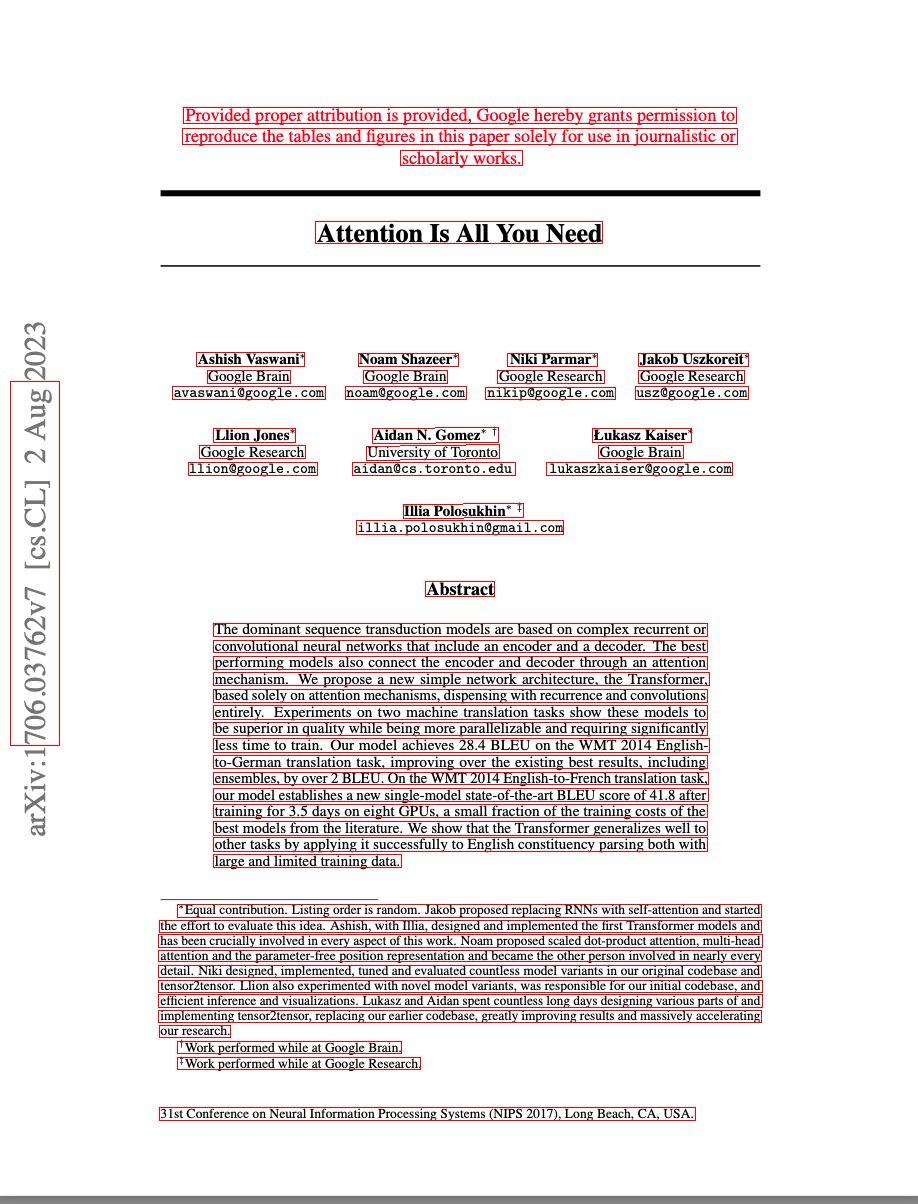

In [5]:
line_polygons = [p.polygon for p in line_predictions[0].bboxes]
line_bbox_image = draw_polys_on_image(line_polygons, copy.deepcopy(image))
line_bbox_image

In [6]:
layout_predictions = batch_layout_detection([image], layout_det_model, layout_det_processor, line_predictions)

Detecting bboxes: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


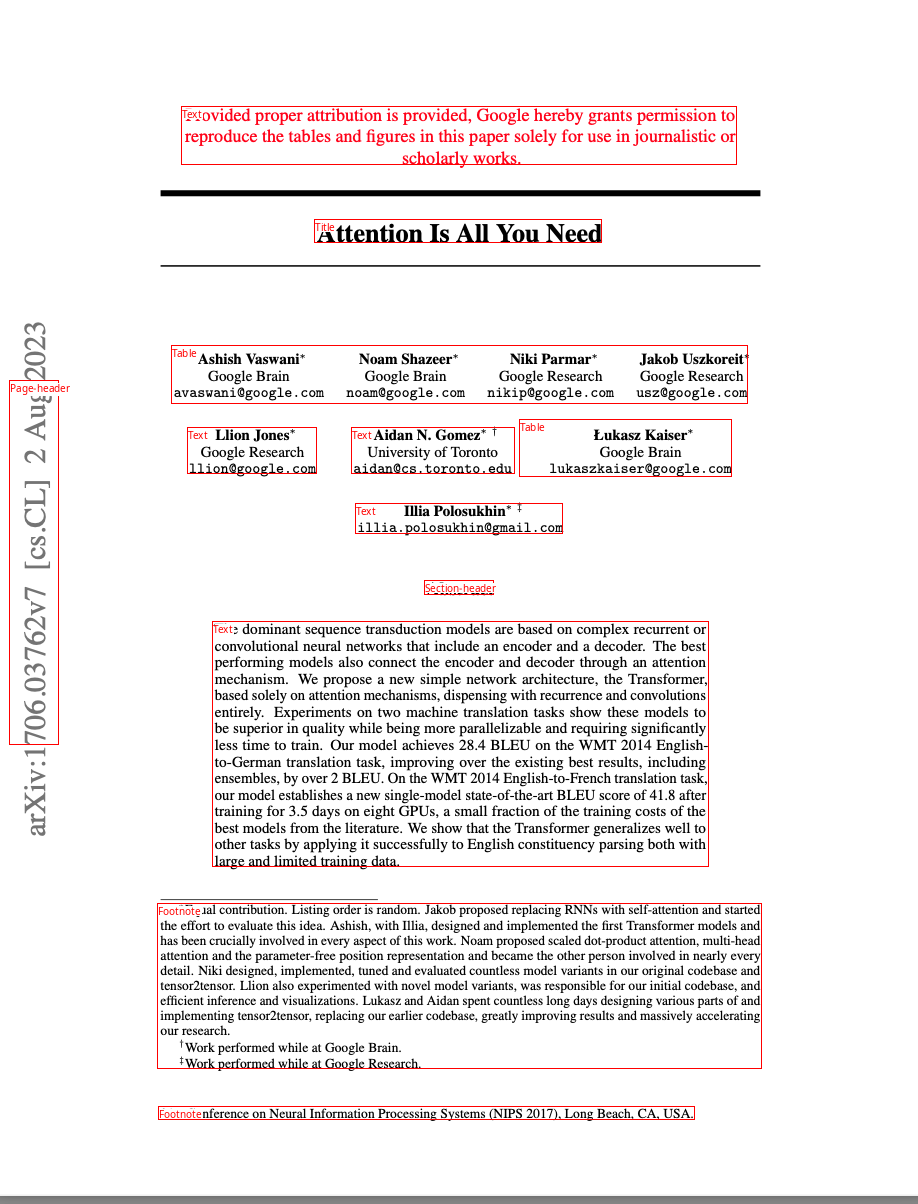

In [7]:
polygons = [p.polygon for p in layout_predictions[0].bboxes]
labels = [p.label for p in layout_predictions[0].bboxes]
bbox_image = draw_polys_on_image(polygons, copy.deepcopy(image), labels=labels)
bbox_image

In [8]:
text_recognition = run_recognition([image], [['en']], rec_model, rec_processor, None, [line_polygons])

Recognizing Text: 100%|██████████████████████████████████████████████████████████████| 14/14 [00:28<00:00,  2.05s/it]


In [9]:
text_recognition[0]

OCRResult(text_lines=[TextLine(polygon=[[183.0, 107.0], [736.0, 107.0], [736.0, 123.0], [183.0, 123.0]], confidence=None, text='Provided proper attribution is provided, Google hereby grants permission to', bbox=[183.0, 107.0, 736.0, 123.0]), TextLine(polygon=[[182.0, 128.0], [737.0, 128.0], [737.0, 144.0], [182.0, 144.0]], confidence=None, text='reproduce the tables and figures in this paper solely for use in journalistic or', bbox=[182.0, 128.0, 737.0, 144.0]), TextLine(polygon=[[400.0, 150.0], [522.0, 150.0], [522.0, 165.0], [400.0, 165.0]], confidence=None, text='scholarly works.', bbox=[400.0, 150.0, 522.0, 165.0]), TextLine(polygon=[[315.0, 221.0], [602.0, 221.0], [602.0, 243.0], [315.0, 243.0]], confidence=None, text='Attention Is All You Need', bbox=[315.0, 221.0, 602.0, 243.0]), TextLine(polygon=[[196.0, 352.0], [304.0, 352.0], [304.0, 366.0], [196.0, 366.0]], confidence=None, text='Ashish Vaswani*', bbox=[196.0, 352.0, 304.0, 366.0]), TextLine(polygon=[[358.0, 353.0], [458.0, 

In [10]:
layout_predictions[0]

LayoutResult(bboxes=[LayoutBox(polygon=[[157, 903], [761, 903], [761, 1068], [157, 1068]], confidence=1.0, label='Footnote', bbox=[157, 903, 761, 1068]), LayoutBox(polygon=[[158, 1106], [694, 1106], [694, 1119], [158, 1119]], confidence=1.0, label='Footnote', bbox=[158, 1106, 694, 1119]), LayoutBox(polygon=[[9, 380], [58, 380], [58, 744], [9, 744]], confidence=1.0, label='Page-header', bbox=[9, 380, 58, 744]), LayoutBox(polygon=[[424, 580], [493, 580], [493, 594], [424, 594]], confidence=1.0, label='Section-header', bbox=[424, 580, 493, 594]), LayoutBox(polygon=[[171, 345], [747, 345], [747, 403], [171, 403]], confidence=1.0, label='Table', bbox=[171, 345, 747, 403]), LayoutBox(polygon=[[519, 419], [731, 419], [731, 476], [519, 476]], confidence=1.0, label='Table', bbox=[519, 419, 731, 476]), LayoutBox(polygon=[[181, 106], [736, 106], [736, 164], [181, 164]], confidence=1.0, label='Text', bbox=[181, 106, 736, 164]), LayoutBox(polygon=[[351, 427], [514, 427], [514, 473], [351, 473]], co

In [11]:
lines, blocks = process_detection_result(text_recognition[0].text_lines, layout_predictions[0].bboxes, layout_predictions[0].image_bbox)

In [12]:
lines

[{'boundingBox': [0.19934640522875818,
   0.0888704318936877,
   0.8017429193899782,
   0.10215946843853821],
  'text': 'Provided proper attribution is provided, Google hereby grants permission to',
  'id': '183.0-107.0,736.0,123.0'},
 {'boundingBox': [0.19825708061002179,
   0.10631229235880399,
   0.8028322440087146,
   0.11960132890365449],
  'text': 'reproduce the tables and figures in this paper solely for use in journalistic or',
  'id': '182.0-128.0,737.0,144.0'},
 {'boundingBox': [0.4357298474945534,
   0.12458471760797342,
   0.5686274509803921,
   0.13704318936877077],
  'text': 'scholarly works.',
  'id': '400.0-150.0,522.0,165.0'},
 {'boundingBox': [0.3431372549019608,
   0.18355481727574752,
   0.6557734204793029,
   0.20182724252491693],
  'text': 'Attention Is All You Need',
  'id': '315.0-221.0,602.0,243.0'},
 {'boundingBox': [0.21350762527233116,
   0.292358803986711,
   0.3311546840958606,
   0.30398671096345514],
  'text': 'Ashish Vaswani*',
  'id': '196.0-352.0,304.

In [13]:
blocks

[{'text': '* Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started\nthe effort to evaluate this idea. Ashish, with Illia, designed and implemented the first Transformer models and\nhas been crucially involved in every aspect of this work. Noam proposed scaled dot-product attention, multi-head\nattention and the parameter-free position representation and became the other person involved in nearly every\ndetail. Niki designed, implemented, tuned and evaluated countless model variants in our original codebase and\ntensor2tensor. Llion also experimented with novel model variants, was responsible for our initial codebase, and\nefficient inference and visualizations. Lukasz and Aidan spent countless long days designing various parts of and\nimplementing tensor2tensor, replacing our earlier codebase, greatly improving results and massively accelerating\nour research.\nT Work performed while at Google Brain.\n+ Work performed while at Google